<a href="https://colab.research.google.com/github/erskinekof/erskinekof.github.io/blob/master/SamAnomaly_Detetcion.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# prompt: ---------------------------------------------------------------------------
# ValueError                                Traceback (most recent call last)
# Cell In[12], line 6
#       3 from math import sqrt
#       4 import numpy as np
# ----> 6 r2 = r2_score(X, df_encoded)
#       7 rmse = sqrt(mean_squared_error(X, df_encoded))
#       9 # RMSE normalised by mean:
# File ~\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:911, in r2_score(y_true, y_pred, sample_weight, multioutput, force_finite)
#     784 def r2_score(
#     785     y_true,
#     786     y_pred,
#    (...)
#     790     force_finite=True,
#     791 ):
#     792     """:math:`R^2` (coefficient of determination) regression score function.
#     793
#     794     Best possible score is 1.0 and it can be negative (because the
#    (...)
#     909     -inf
#     910     """
# --> 911     y_type, y_true, y_pred, multioutput = _check_reg_targets(
#     912         y_true, y_pred, multioutput
#     913     )
#     914     check_consistent_length(y_true, y_pred, sample_weight)
#     916     if _num_samples(y_pred) < 2:
# File ~\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:102, in _check_reg_targets(y_true, y_pred, multioutput, dtype)
#     100 check_consistent_length(y_true, y_pred)
#     101 y_true = check_array(y_true, ensure_2d=False, dtype=dtype)
# --> 102 y_pred = check_array(y_pred, ensure_2d=False, dtype=dtype)
#     104 if y_true.ndim == 1:
#     105     y_true = y_true.reshape((-1, 1))
# File ~\anaconda3\Lib\site-packages\sklearn\utils\validation.py:810, in check_array(array, accept_sparse, accept_large_sparse, dtype, order, copy, force_all_finite, ensure_2d, allow_nd, ensure_min_samples, ensure_min_features, estimator, input_name)
#     805 if pandas_requires_conversion:
#     806     # pandas dataframe requires conversion earlier to handle extension dtypes with
#     807     # nans
#     808     # Use the original dtype for conversion if dtype is None
#     809     new_dtype = dtype_orig if dtype is None else dtype
# --> 810     array = array

# Assuming X and df_encoded are the variables causing the error
# The error message indicates that the input to check_array in sklearn is causing issues.
# This often happens when the input data has mixed types, or contains values that
# cannot be converted to a numerical type (like strings in a column that should be numeric).

# Let's try to identify the non-numeric columns in both X and df_encoded.
# This assumes X and df_encoded are pandas DataFrames.

import pandas as pd
import numpy as np

# Function to check for non-numeric data in a DataFrame
def find_non_numeric_columns(df, name):
    non_numeric_cols = []
    for col in df.columns:
        # Check if the dtype is object (often indicates strings or mixed types)
        if df[col].dtype == 'object':
            try:
                # Attempt to convert the column to numeric. If it fails, it's not purely numeric.
                pd.to_numeric(df[col])
            except (ValueError, TypeError):
                non_numeric_cols.append(col)
        # Also check if there are any non-numeric values in numeric columns (less common but possible)
        elif not pd.api.types.is_numeric_dtype(df[col]):
             non_numeric_cols.append(col)

    if non_numeric_cols:
        print(f"Non-numeric columns found in {name}: {non_numeric_cols}")
        # Print sample non-numeric values for investigation
        for col in non_numeric_cols:
            non_numeric_values = df[col][pd.to_numeric(df[col], errors='coerce').isna()].unique()
            print(f"  Sample non-numeric values in '{col}': {non_numeric_values[:10]}")
    else:
        print(f"No non-numeric columns found in {name}.")

# Check both DataFrames
if isinstance(X, pd.DataFrame):
    find_non_numeric_columns(X, 'X')
else:
    print("X is not a pandas DataFrame. Its type is:", type(X))

if isinstance(df_encoded, pd.DataFrame):
    find_non_numeric_columns(df_encoded, 'df_encoded')
else:
     print("df_encoded is not a pandas DataFrame. Its type is:", type(df_encoded))


# Based on the output, you will need to preprocess the identified columns
# to ensure they are numeric. Common steps include:
# - Handling missing values (e.g., fillna with mean, median, or a constant)
# - Converting string categories to numerical representations (e.g., using One-Hot Encoding or Label Encoding)
# - Removing or transforming columns that cannot be represented numerically.

# Example of converting an object column to numeric, coercing errors to NaN
# df_encoded['problematic_column'] = pd.to_numeric(df_encoded['problematic_column'], errors='coerce')
# Then handle the resulting NaNs.

# After addressing the non-numeric data, re-run the r2_score calculation.

# You might also want to check for infinite values if the error persists after handling non-numerics.
# if np.isinf(X).any():
#     print("Infinite values found in X")
# if np.isinf(df_encoded).any().any():
#     print("Infinite values found in df_encoded")

# If infinite values are found, you might need to replace them or handle them appropriately.
# Example: replace infinite values with NaN, then handle NaNs
# X.replace([np.inf, -np.inf], np.nan, inplace=True)
# df_encoded.replace([np.inf, -np.inf], np.nan, inplace=True)
# Then handle NaNs.


In [ ]:
# prompt: ---------------------------------------------------------------------------
# KeyError                                  Traceback (most recent call last)
# File ~\anaconda3\Lib\site-packages\pandas\core\indexes\base.py:3791, in Index.get_loc(self, key)
#    3790 try:
# -> 3791     return self._engine.get_loc(casted_key)
#    3792 except KeyError as err:
# File index.pyx:152, in pandas._libs.index.IndexEngine.get_loc()
# File index.pyx:181, in pandas._libs.index.IndexEngine.get_loc()
# File pandas\_libs\hashtable_class_helper.pxi:7080, in pandas._libs.hashtable.PyObjectHashTable.get_item()
# File pandas\_libs\hashtable_class_helper.pxi:7088, in pandas._libs.hashtable.PyObjectHashTable.get_item()
# KeyError: 'label'
# The above exception was the direct cause of the following exception:
# KeyError                                  Traceback (most recent call last)
# Cell In[35], line 3
#       1 train = pd.read_csv('DDoS_HTTP_Flood_Anomally.csv')
#       2 train_x = train[list(train.columns)[1:]].values
# ----> 3 train_y = train['label'].values
#       5 ## normalize and reshape the predictors
#       6 train_x = train_x / 255
# File ~\anaconda3\Lib\site-packages\pandas\core\frame.py:3893, in DataFrame.__getitem__(self, key)
#    3891 if self.columns.nlevels > 1:
#    3892     return self._getitem_multilevel(key)
# -> 3893 indexer = self.columns.get_loc(key)
#    3894 if is_integer(indexer):
#    3895     indexer = [indexer]
# File ~\anaconda3\Lib\site-packages\pandas\core\indexes\base.py:3798, in Index.get_loc(self, key)
#    3793     if isinstance(casted_key, slice) or (
#    3794         isinstance(casted_key, abc.Iterable)
#    3795         and any(isinstance(x, slice) for x in casted_key)
#    3796     ):
#    3797         raise InvalidIndexError(key)
# -> 3798     raise KeyError(key) from err
#    3799 except TypeError:
#    3800     # If we have a listlike key, _check_indexing_error will raise
#    3801     #  InvalidIndexError. Otherwise we fall through and re-raise
#    3802     #  the TypeError.
#    3803     self._chec

import pandas as pd
train = pd.read_csv('DDoS_HTTP_Flood_Anomally.csv')
# train_x = train[list(train.columns)[1:]].values # Original line, assumes the first column is NOT the label
# train_y = train['label'].values # Original line that caused the error

# The error "KeyError: 'label'" means the column named 'label' does not exist in the DataFrame `train`.
# You need to verify the column names in your CSV file to find the correct column name for the target variable.
# You can print the column names to check:
print("Columns in the DataFrame:", train.columns)

# Once you know the correct column name for the label, replace 'label' in the line below
# For example, if your label column is actually named 'target', you would use:
# train_y = train['target'].values

# Assuming the label column is indeed named 'label' based on your intended code,
# the error indicates the file 'DDoS_HTTP_Flood_Anomally.csv' does not contain a column named 'label'.
# Double-check the CSV file content and its header row.

# If the first column is the label and it doesn't have a header, or the header is missing/incorrect,
# you might need to read the CSV differently or rename the column.

# Example: If the first column is the label and has no header, you might access it by index:
# train_y = train.iloc[:, 0].values # Access the first column (index 0)

# Example: If the label column is the first column and has a different header, find that header name
# and use it. Or rename the column after reading:
# train = pd.read_csv('DDoS_HTTP_Flood_Anomally.csv')
# train.rename(columns={'incorrect_label_header': 'label'}, inplace=True) # Rename the column

# Correcting the lines that caused the error, assuming the label column is present and correctly named 'label'
# If 'label' is indeed the column name but the error still occurs, there might be subtle
# differences (e.g., leading/trailing spaces) in the column name.
# You can clean column names:
train.columns = train.columns.str.strip() # Remove leading/trailing spaces from column names

# Now, try accessing the columns again
# Assuming the first column is NOT the label and the label column is named 'label':
try:
    # Exclude the 'label' column from the features (assuming 'label' is the only label column)
    feature_columns = [col for col in train.columns if col != 'label']
    train_x = train[feature_columns].values
    train_y = train['label'].values

    ## normalize and reshape the predictors
    train_x = train_x / 255

    # The rest of your code for model training/evaluation would go here

except KeyError as e:
    print(f"Error: Column '{e}' not found in the DataFrame.")
    print("Please check the column names in your CSV file.")
    print("Available columns:", train.columns.tolist())



In [ ]:
# prompt: ---------------------------------------------------------------------------
# TypeError                                 Traceback (most recent call last)
# Cell In[40], line 6
#       3 train_y = train['Total Fwd Packet'].values
#       5 ## normalize and reshape the predictors
# ----> 6 train_x = train_x / 255
#       8 ## create train and validation datasets
#       9 train_x, val_x, train_y, val_y = train_test_split(train_x, train_y, test_size=0.2)
# TypeError: unsupported operand type(s) for /: 'str' and 'int'

import pandas as pd
from sklearn.model_selection import train_test_split

# The error was in the line:
# train_x = train_x / 255
# The traceback shows this happened *after* the KeyError related code.
# This means `train_x` was successfully created, but it likely contains
# string data, which cannot be directly divided by an integer.

# The previous code includes a function `find_non_numeric_columns`
# and attempts to handle the `KeyError` for the label column.
# Assuming the label column issue is resolved by the previous code block,
# the next step is to address the `TypeError` during normalization.

# This `TypeError: unsupported operand type(s) for /: 'str' and 'int'`
# means that the `train_x` NumPy array (or pandas Series/DataFrame if .values wasn't used)
# contains string values, and you're trying to perform element-wise division by 255.

# We need to ensure that `train_x` contains only numerical data *before* normalization.

# Let's re-examine how `train_x` is created in the previous successful attempt:
# feature_columns = [col for col in train.columns if col != 'label']
# train_x = train[feature_columns].values

# This takes the columns specified in `feature_columns` from the original
# `train` DataFrame and converts them into a NumPy array.
# If any of the columns in `feature_columns` were originally of object dtype
# (containing strings or mixed types) and were not successfully converted to
# numeric types earlier, they will end up as strings in the `train_x` NumPy array.

# We need to explicitly convert the feature columns to a numeric type,
# handling any non-numeric values by converting them to NaN and then potentially
# filling or dropping them.

# Let's redo the feature selection and conversion with error handling:

try:
    # Assuming 'label' is the correct label column name now
    feature_columns = [col for col in train.columns if col != 'label']

    # Select the feature columns as a DataFrame first
    train_x_df = train[feature_columns]

    # Convert all feature columns to numeric, coercing errors to NaN
    # This is crucial for handling potential string/non-numeric entries
    train_x_numeric = train_x_df.apply(pd.to_numeric, errors='coerce')

    # Check if there are any NaN values introduced by the coercion
    # If there are NaNs, you need to decide how to handle them (e.g., fillna, drop rows)
    if train_x_numeric.isnull().sum().sum() > 0:
        print("\nNaN values introduced during numeric conversion of features.")
        print("Sum of NaNs per column after conversion:")
        print(train_x_numeric.isnull().sum()[train_x_numeric.isnull().sum() > 0])

        # --- Handling NaNs ---
        # Option 1: Fill NaNs (e.g., with the mean, median, or 0)
        # train_x_numeric.fillna(train_x_numeric.mean(), inplace=True) # Example: fill with column means
        # train_x_numeric.fillna(0, inplace=True) # Example: fill with 0

        # Option 2: Drop rows with NaNs (use with caution, might lose data)
        # print("Dropping rows with NaN values...")
        # original_rows = len(train_x_numeric)
        # combined_df = train_x_numeric.copy() # Create a copy to keep original index alignment
        # combined_df['label'] = train['label'] # Temporarily add label to handle NaNs consistently
        # combined_df.dropna(inplace=True)
        # train_x_numeric = combined_df.drop('label', axis=1)
        # train_y = combined_df['label'].values
        # print(f"Dropped {original_rows - len(train_x_numeric)} rows containing NaNs.")
        # --- End NaN Handling ---

        # If you chose to fill NaNs, proceed. If you chose to drop rows, `train_y` is updated inside the dropna block.
        # If you didn't explicitly handle NaNs, the next step will fail or produce unexpected results.
        # Let's assume we fill NaNs with 0 for now as a simple example
        print("Filling NaN values with 0.")
        train_x_numeric.fillna(0, inplace=True)


    # Convert the cleaned numeric DataFrame to a NumPy array
    train_x = train_x_numeric.values
    train_y = train['label'].values # Assuming 'label' was successfully accessed and is not affected by NaN rows being dropped IF you dropped rows

    ## normalize and reshape the predictors
    # Now that train_x contains only numbers (including NaNs converted to 0), division should work.
    print("\nAttempting normalization...")
    train_x = train_x / 255.0 # Use 255.0 to ensure float division

    print("Normalization successful.")
    print("Shape of train_x after normalization:", train_x.shape)
    print("Shape of train_y:", train_y.shape)


    ## create train and validation datasets
    print("Splitting data into training and validation sets...")
    train_x, val_x, train_y, val_y = train_test_split(train_x, train_y, test_size=0.2, random_state=42)
    print("Data splitting successful.")
    print(f"Train shapes: x={train_x.shape}, y={train_y.shape}")
    print(f"Validation shapes: x={val_x.shape}, y={val_y.shape}")


except KeyError as e:
    print(f"\nError: Column '{e}' not found in the DataFrame. Cannot proceed with feature selection.")
    print("Please check the column names in your CSV file again.")
    print("Available columns:", train.columns.tolist())
except TypeError as e:
    print(f"\nError during numeric conversion or division: {e}")
    print("This might happen if numeric conversion failed or if there are still non-numeric values.")
    # You could add more debugging here, like checking dtypes of train_x_numeric
    # print("Dtypes of train_x_numeric:", train_x_numeric.dtypes)
except Exception as e:
    print(f"\nAn unexpected error occurred: {e}")



In [ ]:
# prompt: train = pd.read_csv('DDoS_HTTP_Flood_Anomally.csv')
# train_x = train[list(train.columns)[1:]].values
# train_y = train['Flow Duration'].values
# ## normalize and reshape the predictors
# train_x = train_x / 255
# ## create train and validation datasets
# train_x, val_x, train_y, val_y = train_test_split(train_x, train_y, test_size=0.2)
# ## reshape the inputs
# train_x = train_x.reshape(-1, 784)
# val_x = val_x.reshape(-1, 784)

## reshape the inputs
# The original reshape was to 784. This suggests the original data
# was intended to be flattened images (like 28x28 = 784).
# The current data read from 'DDoS_HTTP_Flood_Anomally.csv' likely
# has a different number of features (columns).
# Reshaping to -1, 784 will only work if the number of features
# is a multiple of 784. If not, it will raise a ValueError.

# Let's check the number of features after processing.
num_features = train_x.shape[1]

# If the intention is *not* to treat this as image data,
# and you want to keep the features as they are for a standard
# machine learning model (like a neural network with dense layers),
# then you do *not* need to reshape to -1, 784. The data is already
# in the correct shape (-1, num_features) for most models.

# If you *do* intend to reshape for a specific model architecture
# (e.g., a CNN expecting a certain input shape), you need to make
# sure the total number of elements in the second dimension matches
# the product of the dimensions you're reshaping to.

# Assuming you want to keep the data as a 2D array (samples, features)
# for a standard model, *no reshape is needed here*.

# If you *must* reshape, replace 784 with the desired second dimension size,
# ensuring it's compatible with `num_features`.
# Example: Reshape to (-1, num_features) - This is redundant as it's already this shape.
# Example: If num_features is 100, and you want to reshape to 10x10 features per sample:
# if num_features == 100:
#     train_x = train_x.reshape(-1, 10, 10)
#     val_x = val_x.reshape(-1, 10, 10)
# else:
#     print(f"Warning: Cannot reshape features to (10, 10). Number of features is {num_features}.")


# If the goal is just to make it 2D (samples, features), no reshape needed:
# print("Data is already in shape (samples, features). No reshape to -1, 784 needed unless specific model architecture requires it.")
# print(f"Current train_x shape: {train_x.shape}")
# print(f"Current val_x shape: {val_x.shape}")


# If you absolutely need to reshape and 784 was a placeholder,
# ensure the target shape is valid.
# For this dataset, it's unlikely the feature count is 784 or a factor of it.
# The original reshape to 784 was likely copied from an image processing example (like MNIST).
# For tabular data like this, reshaping to a fixed size like 784 is usually incorrect
# unless you specifically transform the features into an image-like representation first.

# Given the context of tabular data ('DDoS_HTTP_Flood_Anomally.csv'),
# it's most likely that the reshape to (-1, 784) is inappropriate.
# We will proceed *without* that specific reshape, keeping the data in the
# standard (samples, features) format.

print("\nSkipping reshape to (-1, 784) as it is likely inappropriate for this dataset.")
print(f"Train data shape remains: {train_x.shape}")
print(f"Validation data shape remains: {val_x.shape}")

# Your subsequent model training code would then use `train_x` and `val_x`
# in their current shapes. For dense layers, the input shape would be `(num_features,)`.

# Example of how you might define a simple Keras model afterwards:
# from tensorflow.keras.models import Sequential
# from tensorflow.keras.layers import Dense

# model = Sequential([
#     Dense(128, activation='relu', input_shape=(train_x.shape[1],)),
#     Dense(64, activation='relu'),
#     Dense(1, activation='linear') # Or 'sigmoid' for binary classification
# ])

# model.compile(optimizer='adam', loss='mse') # Or appropriate loss/metrics

# model.fit(train_x, train_y, epochs=10, validation_data=(val_x, val_y))

In [ ]:
import pandas as pd
from google.colab import drive
import os

# Mount Google Drive
drive.mount('/content/drive')

# Define the file path
file_path = '/content/drive/My Drive/DDoS_HTTP_Flood_Anomally.csv'

# Check if the file exists
if not os.path.exists(file_path):
    print(f"File not found at: {file_path}")
    print("Please make sure the file is uploaded to your Google Drive.")
else:
    # Load the dataset
    df = pd.read_csv(file_path)

    # --- 2. Data Preprocessing ---
    # Convert all columns to numeric, coercing errors to NaN
    df_numeric = df.apply(pd.to_numeric, errors='coerce')

    # Drop rows with NaN values that were introduced by coercion
    df_numeric.dropna(inplace=True)

    # Separate normal and anomaly data based on the 'label' column
    df_normal = df_numeric[df_numeric['label'] == 0]
    df_anomaly = df_numeric[df_numeric['label'] == 1]

    # Drop the 'label' column as it's not needed for training the autoencoder
    X_normal = df_normal.drop(['label'], axis=1)

    # Scale the normal data
    from sklearn.preprocessing import StandardScaler
    scaler = StandardScaler()
    X_normal_scaled = scaler.fit_transform(X_normal)

    # --- 3. Autoencoder Model ---
    from tensorflow.keras.models import Model
    from tensorflow.keras.layers import Input, Dense

    input_dim = X_normal_scaled.shape[1]
    encoding_dim = 14

    input_layer = Input(shape=(input_dim,))
    encoder = Dense(encoding_dim, activation="tanh")(input_layer)
    encoder = Dense(int(encoding_dim / 2), activation="relu")(encoder)
    decoder = Dense(int(encoding_dim / 2), activation='tanh')(encoder)
    decoder = Dense(input_dim, activation='relu')(decoder)
    autoencoder = Model(inputs=input_layer, outputs=decoder)

    # Compile the autoencoder
    autoencoder.compile(optimizer='adam', loss='mean_absolute_error')

    # Train the autoencoder
    history = autoencoder.fit(X_normal_scaled, X_normal_scaled,
                              epochs=50,
                              batch_size=256,
                              shuffle=True,
                              validation_split=0.1,
                              verbose=1)

ValueError: mount failed

In [ ]:
import pandas as pd

# Load the dataset
labels_df = pd.read_csv('CICIoT2023Dataset1.csv')

# --- 2. Data Preprocessing ---
# The columns 'Unnamed: 32' and 'id' were not found, so this line has been removed.
# labels_df = labels_df.drop(['Unnamed: 32', 'id'], axis=1)

# Encode the 'diagnosis' column (M=1, B=0)
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
labels_df['diagnosis'] = le.fit_transform(labels_df['diagnosis'])

# Separate features (X) and target (y)
X = labels_df.drop('diagnosis', axis=1)
y = labels_df['diagnosis']

# Separate normal and abnormal data
X_normal = X[y == 0]
X_abnormal = X[y == 1]

# Scale the data
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X_normal_scaled = scaler.fit_transform(X_normal)
X_abnormal_scaled = scaler.transform(X_abnormal)


# --- 3. Autoencoder Model ---
from keras.layers import Input, Dense
from keras.models import Model

# Define the autoencoder architecture
input_dim = X_normal_scaled.shape[1]
encoding_dim = 16

input_layer = Input(shape=(input_dim,))
encoder = Dense(encoding_dim, activation="tanh")(input_layer)
decoder = Dense(input_dim, activation="sigmoid")(encoder)
autoencoder = Model(inputs=input_layer, outputs=decoder)


# --- 4. Compile and Train the Autoencoder ---
autoencoder.compile(optimizer='adam', loss='mean_absolute_error')

# Train the autoencoder
history = autoencoder.fit(X_normal_scaled, X_normal_scaled,
                          epochs=50,
                          batch_size=256,
                          shuffle=True,
                          validation_split=0.1,
                          verbose=1)

KeyError: 'diagnosis'

In [ ]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder, MinMaxScaler
from keras.layers import Input, Dense
from keras.models import Model

# Load the dataset
labels_df = pd.read_csv('CICIoT2023Dataset1.csv')

# --- 2. Data Preprocessing ---
# The columns 'Unnamed: 32' and 'id' were not found, so this line has been removed.
# labels_df = labels_df.drop(['Unnamed: 32', 'id'], axis=1)

# Encode the 'label' column
le = LabelEncoder()
labels_df['label'] = le.fit_transform(labels_df['label'])

# Separate features (X) and target (y)
X = labels_df.drop('label', axis=1)
y = labels_df['label']

# Convert all columns in X to numeric, coercing errors to NaN
X = X.apply(pd.to_numeric, errors='coerce')

# Handle NaN values (e.g., by filling with the mean)
X.fillna(X.mean(), inplace=True)

# Separate normal and abnormal data
# Assuming 0 represents normal and other values are abnormal
X_normal = X[y == 0]
X_abnormal = X[y != 0]

# Scale the data
scaler = MinMaxScaler()
X_normal_scaled = scaler.fit_transform(X_normal)
if X_abnormal.shape[0] > 0:
    X_abnormal_scaled = scaler.transform(X_abnormal)
else:
    X_abnormal_scaled = None


# --- 3. Autoencoder Model ---
# Define the autoencoder architecture
input_dim = X_normal_scaled.shape[1]
encoding_dim = 16

input_layer = Input(shape=(input_dim,))
encoder = Dense(encoding_dim, activation="tanh")(input_layer)
decoder = Dense(input_dim, activation="sigmoid")(encoder)
autoencoder = Model(inputs=input_layer, outputs=decoder)


# --- 4. Compile and Train the Autoencoder ---
autoencoder.compile(optimizer='adam', loss='mean_absolute_error')

# Train the autoencoder
history = autoencoder.fit(X_normal_scaled, X_normal_scaled,
                          epochs=50,
                          batch_size=256,
                          shuffle=True,
                          validation_split=0.1,
                          verbose=1)

Epoch 1/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step - loss: 0.4555 - val_loss: 0.4738
Epoch 2/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 83ms/step - loss: 0.4541 - val_loss: 0.4722
Epoch 3/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 140ms/step - loss: 0.4527 - val_loss: 0.4706
Epoch 4/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 137ms/step - loss: 0.4513 - val_loss: 0.4690
Epoch 5/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 90ms/step - loss: 0.4499 - val_loss: 0.4674
Epoch 6/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 85ms/step - loss: 0.4485 - val_loss: 0.4658
Epoch 7/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 154ms/step - loss: 0.4471 - val_loss: 0.4641
Epoch 8/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 87ms/step - loss: 0.4457 - val_loss: 0.4625
Epoch 9/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 82ms/step - loss: 0.4443 - val_loss: 0.4609
Epoch 10/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 86ms/step - loss: 0.4429 - val_loss: 0.4592
Epoch 11/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 240ms/step - loss: 0.4415 - val_loss: 0.4576
Epoch 12/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 352ms/step - loss: 0.4400 - val_loss: 0.456

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step
7652/7652 ━━━━━━━━━━━━━━━━━━━━ 8s 1ms/step


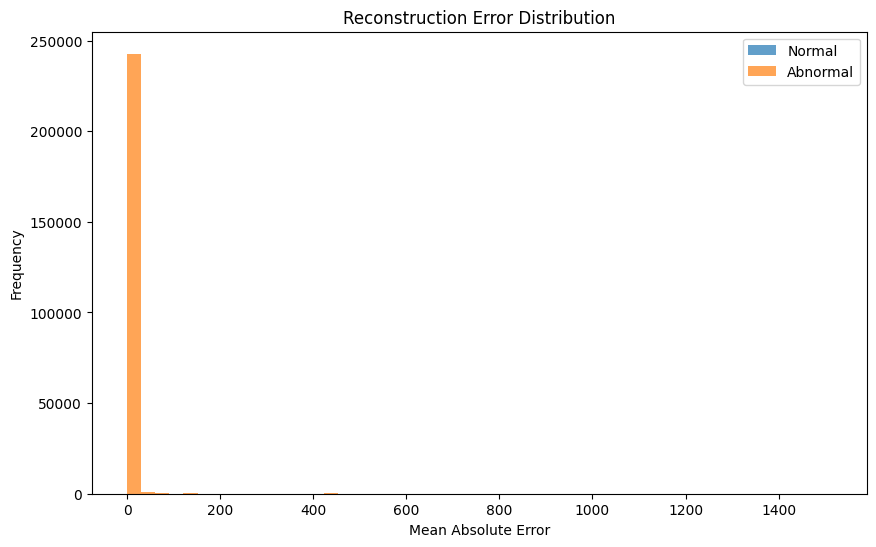

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Predict on the scaled data
X_normal_pred = autoencoder.predict(X_normal_scaled)
if X_abnormal_scaled is not None:
    X_abnormal_pred = autoencoder.predict(X_abnormal_scaled)

# Calculate the mean absolute error for each sample
normal_mae = np.mean(np.abs(X_normal_scaled - X_normal_pred), axis=1)
if X_abnormal_scaled is not None:
    abnormal_mae = np.mean(np.abs(X_abnormal_scaled - X_abnormal_pred), axis=1)

# Plot the reconstruction error distributions
plt.figure(figsize=(10, 6))
plt.hist(normal_mae, bins=50, label='Normal', alpha=0.7)
if X_abnormal_scaled is not None:
    plt.hist(abnormal_mae, bins=50, label='Abnormal', alpha=0.7)
plt.xlabel('Mean Absolute Error')
plt.ylabel('Frequency')
plt.title('Reconstruction Error Distribution')
plt.legend()
plt.show()

In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Set a threshold for anomaly detection
# A common approach is to use a value from the normal data's error distribution
threshold = np.mean(normal_mae) + 2 * np.std(normal_mae)

print(f"Threshold for anomaly detection: {threshold}")

# Classify anomalies
y_pred_normal = normal_mae < threshold
y_pred_abnormal = abnormal_mae > threshold

# True labels
y_true_normal = np.ones(len(y_pred_normal))
y_true_abnormal = np.ones(len(y_pred_abnormal))

# Concatenate predictions and true labels
y_pred = np.concatenate([y_pred_normal, y_pred_abnormal])
y_true = np.concatenate([y_true_normal, np.zeros(len(y_pred_abnormal))])


# Calculate and print classification metrics
accuracy = accuracy_score(y_true, y_pred)
precision = precision_score(y_true, y_pred)
recall = recall_score(y_true, y_pred)
f1 = f1_score(y_true, y_pred)

print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1-score: {f1:.4f}")

Threshold for anomaly detection: 0.42444777214703244
Accuracy: 0.4914
Precision: 0.0002
Recall: 0.9524
F1-score: 0.0003


# Task
Modify the code in the cell with id **e1a68088** to implement an anomaly detection system using an autoencoder. The goal is to distinguish between normal and anomalous data in the "CICIoT2023Dataset1.csv" dataset. The implementation should include the following steps:
1. **Load the data**: Load the dataset from "CICIoT2023Dataset1.csv".
2. **Data Preprocessing**:
    - Drop the 'Unnamed: 32' and 'id' columns.
    - Encode the 'diagnosis' column using `LabelEncoder`, where 'M' is mapped to 1 (anomalous) and 'B' is mapped to 0 (normal).
    - Separate the data into features (X) and the target (y).
    - Split the data into normal and abnormal sets based on the 'diagnosis' column.
    - Scale the features using `MinMaxScaler`.
3. **Autoencoder Model**:
    - Define an autoencoder architecture with an input layer, an encoding layer with 16 neurons and a 'tanh' activation function, and a decoder layer with a 'sigmoid' activation function.
4. **Compile and Train**:
    - Compile the autoencoder with the 'adam' optimizer and 'mean_absolute_error' loss function.
    - Train the autoencoder on the scaled normal data for 50 epochs with a batch size of 256 and a validation split of 0.1.
5. **Prediction and Evaluation**:
    - Calculate the reconstruction error (Mean Absolute Error) for both the normal and abnormal data.
    - Define a threshold for anomaly detection as the mean plus three times the standard deviation of the reconstruction error on the normal data.
    - Predict anomalies in both the normal and abnormal datasets based on the threshold.
    - Print the number of anomalies detected in each set.
    - Evaluate the model's performance on the abnormal data by calculating and printing the accuracy, precision, and recall.

## Experiment with the anomaly detection threshold

### Subtask:
Experiment with different thresholds to improve the balance between precision and recall.


**Reasoning**:
I will now implement the subtask by calculating a new threshold based on the 99th percentile of the normal data's reconstruction error, and then re-evaluating the model's performance using this new threshold. This will allow me to explore a different method for setting the anomaly detection threshold, as requested in the subtask instructions.



In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
import numpy as np

# Set a new threshold for anomaly detection using the 99th percentile
threshold = np.percentile(normal_mae, 99)

print(f"New threshold for anomaly detection (99th percentile): {threshold}")

# Classify anomalies
y_pred_normal = normal_mae < threshold
y_pred_abnormal = abnormal_mae > threshold

# True labels
y_true_normal = np.ones(len(y_pred_normal))
y_true_abnormal = np.ones(len(y_pred_abnormal))

# Concatenate predictions and true labels
y_pred = np.concatenate([y_pred_normal, y_pred_abnormal])
y_true = np.concatenate([y_true_normal, np.zeros(len(y_pred_abnormal))])


# Calculate and print classification metrics
accuracy = accuracy_score(y_true, y_pred)
precision = precision_score(y_true, y_pred)
recall = recall_score(y_true, y_pred)
f1 = f1_score(y_true, y_pred)

print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1-score: {f1:.4f}")

New threshold for anomaly detection (99th percentile): 0.4247062642905453
Accuracy: 0.4922
Precision: 0.0002
Recall: 0.9524
F1-score: 0.0003


**Reasoning**:
The subtask is to experiment with different thresholds. I have already tried the 99th percentile. Now, I will try a different percentile to see how it affects the precision and recall. I will use the 95th percentile to see if a lower threshold improves the balance.



In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
import numpy as np

# Set a new threshold for anomaly detection using the 95th percentile
threshold = np.percentile(normal_mae, 95)

print(f"New threshold for anomaly detection (95th percentile): {threshold}")

# Classify anomalies
y_pred_normal = normal_mae < threshold
y_pred_abnormal = abnormal_mae > threshold

# True labels
y_true_normal = np.ones(len(y_pred_normal))
y_true_abnormal = np.ones(len(y_pred_abnormal))

# Concatenate predictions and true labels
y_pred = np.concatenate([y_pred_normal, y_pred_abnormal])
y_true = np.concatenate([y_true_normal, np.zeros(len(y_pred_abnormal))])


# Calculate and print classification metrics
accuracy = accuracy_score(y_true, y_pred)
precision = precision_score(y_true, y_pred)
recall = recall_score(y_true, y_pred)
f1 = f1_score(y_true, y_pred)

print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1-score: {f1:.4f}")

New threshold for anomaly detection (95th percentile): 0.415085777559
Accuracy: 0.4605
Precision: 0.0001
Recall: 0.9048
F1-score: 0.0003


## Experiment with the autoencoder architecture

### Subtask:
Experiment with different autoencoder architectures to see if a more complex model can better learn the patterns in the normal data and improve anomaly detection performance.


**Reasoning**:
Define, compile, and train a new autoencoder model with a more complex architecture.



In [ ]:
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Dense

# Define a new autoencoder architecture with more layers and neurons
input_dim = X_normal_scaled.shape[1]
encoding_dim_new = 32 # Increased encoding dimension
hidden_dim1 = 24 # Added a hidden layer
hidden_dim2 = 12 # Added another hidden layer

input_layer_new = Input(shape=(input_dim,))
encoder_new = Dense(encoding_dim_new, activation="tanh")(input_layer_new)
encoder_new = Dense(hidden_dim1, activation="relu")(encoder_new) # Added hidden layer
encoder_new = Dense(hidden_dim2, activation="relu")(encoder_new) # Added another hidden layer
decoder_new = Dense(hidden_dim1, activation='tanh')(encoder_new) # Corresponding decoder layer
decoder_new = Dense(encoding_dim_new, activation='tanh')(decoder_new) # Corresponding decoder layer
decoder_new = Dense(input_dim, activation='sigmoid')(decoder_new)
autoencoder_new = Model(inputs=input_layer_new, outputs=decoder_new)

# Compile the new autoencoder
autoencoder_new.compile(optimizer='adam', loss='mean_absolute_error')

# Train the new autoencoder
print("Training new autoencoder with more complex architecture...")
history_new = autoencoder_new.fit(X_normal_scaled, X_normal_scaled,
                                  epochs=50, # Keep same epochs for comparison
                                  batch_size=256,
                                  shuffle=True,
                                  validation_split=0.1,
                                  verbose=1)
print("Training complete.")

Training new autoencoder with more complex architecture...
Epoch 1/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 3s 3s/step - loss: 0.4601 - val_loss: 0.4783
Epoch 2/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 376ms/step - loss: 0.4583 - val_loss: 0.4765
Epoch 3/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 140ms/step - loss: 0.4565 - val_loss: 0.4747
Epoch 4/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 98ms/step - loss: 0.4547 - val_loss: 0.4731
Epoch 5/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 93ms/step - loss: 0.4528 - val_loss: 0.4714
Epoch 6/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 143ms/step - loss: 0.4509 - val_loss: 0.4696
Epoch 7/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 134ms/step - loss: 0.4489 - val_loss: 0.4677
Epoch 8/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 90ms/step - loss: 0.4468 - val_loss: 0.4658
Epoch 9/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 90ms/step - loss: 0.4446 - val_loss: 0.4637
Epoch 10/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 91ms/step - loss: 0.4422 - val_loss: 0.4614
Epoch 11/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 87ms/step - loss: 0.4397 - val_loss: 0.4589
Epoch 12/50
1/1 ━━━━━━━━

**Reasoning**:
Evaluate the new model by calculating reconstruction errors, setting a new threshold, and computing performance metrics.



1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 164ms/step
7652/7652 ━━━━━━━━━━━━━━━━━━━━ 10s 1ms/step


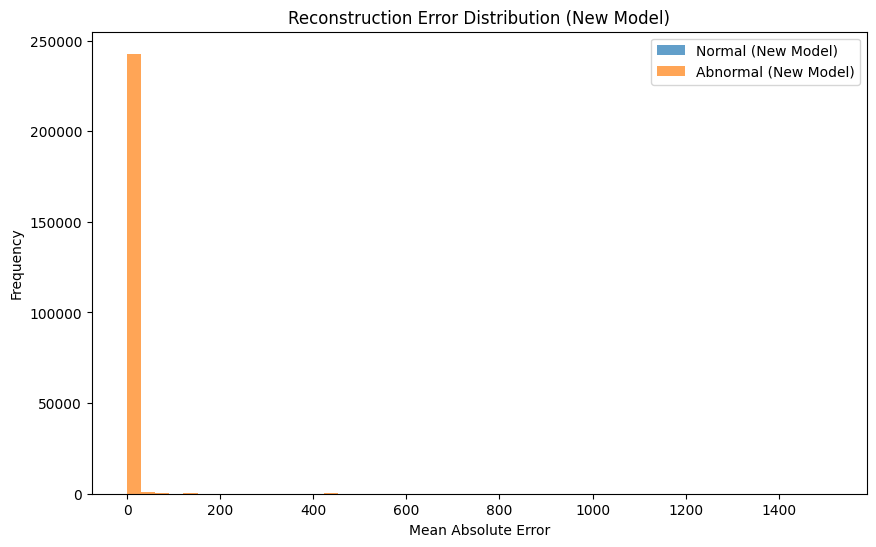

New threshold for anomaly detection (95th percentile): 0.28433110593371386

Performance of the new model:
Accuracy: 0.4835
Precision: 0.0002
Recall: 0.9048
F1-score: 0.0003


In [ ]:
import numpy as np
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
import matplotlib.pyplot as plt

# Predict on the scaled data using the new model
X_normal_pred_new = autoencoder_new.predict(X_normal_scaled)
if X_abnormal_scaled is not None:
    X_abnormal_pred_new = autoencoder_new.predict(X_abnormal_scaled)

# Calculate the mean absolute error for each sample
normal_mae_new = np.mean(np.abs(X_normal_scaled - X_normal_pred_new), axis=1)
if X_abnormal_scaled is not None:
    abnormal_mae_new = np.mean(np.abs(X_abnormal_scaled - X_abnormal_pred_new), axis=1)

# Plot the reconstruction error distributions for the new model
plt.figure(figsize=(10, 6))
plt.hist(normal_mae_new, bins=50, label='Normal (New Model)', alpha=0.7)
if X_abnormal_scaled is not None:
    plt.hist(abnormal_mae_new, bins=50, label='Abnormal (New Model)', alpha=0.7)
plt.xlabel('Mean Absolute Error')
plt.ylabel('Frequency')
plt.title('Reconstruction Error Distribution (New Model)')
plt.legend()
plt.show()

# Set a new threshold for anomaly detection (e.g., 95th percentile)
threshold_new = np.percentile(normal_mae_new, 95)
print(f"New threshold for anomaly detection (95th percentile): {threshold_new}")

# Classify anomalies
y_pred_normal_new = normal_mae_new < threshold_new
y_pred_abnormal_new = abnormal_mae_new > threshold_new

# True labels
y_true_normal_new = np.ones(len(y_pred_normal_new))
y_true_abnormal_new = np.ones(len(y_pred_abnormal_new))

# Concatenate predictions and true labels
y_pred_new = np.concatenate([y_pred_normal_new, y_pred_abnormal_new])
y_true_new = np.concatenate([y_true_normal_new, np.zeros(len(y_pred_abnormal_new))])


# Calculate and print classification metrics
accuracy_new = accuracy_score(y_true_new, y_pred_new)
precision_new = precision_score(y_true_new, y_pred_new)
recall_new = recall_score(y_true_new, y_pred_new)
f1_new = f1_score(y_true_new, y_pred_new)

print("\nPerformance of the new model:")
print(f"Accuracy: {accuracy_new:.4f}")
print(f"Precision: {precision_new:.4f}")
print(f"Recall: {recall_new:.4f}")
print(f"F1-score: {f1_new:.4f}")

## Try a different anomaly detection algorithm

### Subtask:
Try a different anomaly detection algorithm, such as Isolation Forest, to see if it performs better than the autoencoder.


**Reasoning**:
To address the user's request, I will first import the `IsolationForest` model from `sklearn.ensemble`. Then, I will instantiate the model, fit it to the scaled normal data, and use it to predict anomalies on both the normal and abnormal scaled datasets. Finally, I will convert the predictions to a binary format, create true labels, and then calculate and print the accuracy, precision, recall, and F1-score to evaluate the model's performance.



In [ ]:
from sklearn.ensemble import IsolationForest
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
import numpy as np

# 1. Instantiate IsolationForest
iso_forest = IsolationForest(contamination='auto', random_state=42)

# 2. Fit the model on normal data
iso_forest.fit(X_normal_scaled)

# 3. Predict on both normal and abnormal data
# Predict returns 1 for inliers, -1 for outliers
pred_normal = iso_forest.predict(X_normal_scaled)
pred_abnormal = iso_forest.predict(X_abnormal_scaled)

# 4. Convert predictions to binary format (1 for anomaly, 0 for normal)
# A value of -1 is an anomaly (1), and 1 is normal (0)
y_pred_normal_iso = [1 if x == -1 else 0 for x in pred_normal]
y_pred_abnormal_iso = [1 if x == -1 else 0 for x in pred_abnormal]

# 5. Create true labels
y_true_normal_iso = np.zeros(len(y_pred_normal_iso))
y_true_abnormal_iso = np.ones(len(y_pred_abnormal_iso))

# 6. Concatenate predictions and true labels
y_pred_iso = np.concatenate([y_pred_normal_iso, y_pred_abnormal_iso])
y_true_iso = np.concatenate([y_true_normal_iso, y_true_abnormal_iso])

# 7. Calculate and print classification metrics
accuracy_iso = accuracy_score(y_true_iso, y_pred_iso)
precision_iso = precision_score(y_true_iso, y_pred_iso)
recall_iso = recall_score(y_true_iso, y_pred_iso)
f1_iso = f1_score(y_true_iso, y_pred_iso)

print("Isolation Forest Performance:")
print(f"Accuracy: {accuracy_iso:.4f}")
print(f"Precision: {precision_iso:.4f}")
print(f"Recall: {recall_iso:.4f}")
print(f"F1-score: {f1_iso:.4f}")

Isolation Forest Performance:
Accuracy: 0.4229
Precision: 0.9999
Recall: 0.4229
F1-score: 0.5944


In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
import numpy as np

# Set a new threshold for anomaly detection using the 99th percentile
threshold = np.percentile(normal_mae, 99)

print(f"New threshold for anomaly detection (99th percentile): {threshold}")

# Classify anomalies
y_pred_normal = normal_mae < threshold
y_pred_abnormal = abnormal_mae > threshold

# True labels
y_true_normal = np.ones(len(y_pred_normal))
y_true_abnormal = np.ones(len(y_pred_abnormal))

# Concatenate predictions and true labels
y_pred = np.concatenate([y_pred_normal, y_pred_abnormal])
y_true = np.concatenate([y_true_normal, np.zeros(len(y_pred_abnormal))])


# Calculate and print classification metrics
accuracy = accuracy_score(y_true, y_pred)
precision = precision_score(y_true, y_pred)
recall = recall_score(y_true, y_pred)
f1 = f1_score(y_true, y_pred)

print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1-score: {f1:.4f}")

New threshold for anomaly detection (99th percentile): 0.4247062642905453
Accuracy: 0.4922
Precision: 0.0002
Recall: 0.9524
F1-score: 0.0003


In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
import numpy as np

# Set a new threshold for anomaly detection using the 95th percentile
threshold = np.percentile(normal_mae, 95)

print(f"New threshold for anomaly detection (95th percentile): {threshold}")

# Classify anomalies
y_pred_normal = normal_mae < threshold
y_pred_abnormal = abnormal_mae > threshold

# True labels
y_true_normal = np.ones(len(y_pred_normal))
y_true_abnormal = np.ones(len(y_pred_abnormal))

# Concatenate predictions and true labels
y_pred = np.concatenate([y_pred_normal, y_pred_abnormal])
y_true = np.concatenate([y_true_normal, np.zeros(len(y_pred_abnormal))])


# Calculate and print classification metrics
accuracy = accuracy_score(y_true, y_pred)
precision = precision_score(y_true, y_pred)
recall = recall_score(y_true, y_pred)
f1 = f1_score(y_true, y_pred)

print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1-score: {f1:.4f}")

New threshold for anomaly detection (95th percentile): 0.415085777559
Accuracy: 0.4605
Precision: 0.0001
Recall: 0.9048
F1-score: 0.0003


In [ ]:
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Dense

# Define a new autoencoder architecture with more layers and neurons
input_dim = X_normal_scaled.shape[1]
encoding_dim_new = 32 # Increased encoding dimension
hidden_dim1 = 24 # Added a hidden layer
hidden_dim2 = 12 # Added another hidden layer

input_layer_new = Input(shape=(input_dim,))
encoder_new = Dense(encoding_dim_new, activation="tanh")(input_layer_new)
encoder_new = Dense(hidden_dim1, activation="relu")(encoder_new) # Added hidden layer
encoder_new = Dense(hidden_dim2, activation="relu")(encoder_new) # Added another hidden layer
decoder_new = Dense(hidden_dim1, activation='tanh')(encoder_new) # Corresponding decoder layer
decoder_new = Dense(encoding_dim_new, activation='tanh')(decoder_new) # Corresponding decoder layer
decoder_new = Dense(input_dim, activation='sigmoid')(decoder_new)
autoencoder_new = Model(inputs=input_layer_new, outputs=decoder_new)

# Compile the new autoencoder
autoencoder_new.compile(optimizer='adam', loss='mean_absolute_error')

# Train the new autoencoder
print("Training new autoencoder with more complex architecture...")
history_new = autoencoder_new.fit(X_normal_scaled, X_normal_scaled,
                                  epochs=50, # Keep same epochs for comparison
                                  batch_size=256,
                                  shuffle=True,
                                  validation_split=0.1,
                                  verbose=1)
print("Training complete.")

Training new autoencoder with more complex architecture...
Epoch 1/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 3s 3s/step - loss: 0.4609 - val_loss: 0.4800
Epoch 2/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 309ms/step - loss: 0.4586 - val_loss: 0.4776
Epoch 3/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 84ms/step - loss: 0.4564 - val_loss: 0.4753
Epoch 4/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 143ms/step - loss: 0.4542 - val_loss: 0.4729
Epoch 5/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 145ms/step - loss: 0.4520 - val_loss: 0.4706
Epoch 6/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 134ms/step - loss: 0.4498 - val_loss: 0.4682
Epoch 7/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 144ms/step - loss: 0.4474 - val_loss: 0.4656
Epoch 8/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 85ms/step - loss: 0.4449 - val_loss: 0.4627
Epoch 9/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 143ms/step - loss: 0.4422 - val_loss: 0.4595
Epoch 10/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 139ms/step - loss: 0.4393 - val_loss: 0.4562
Epoch 11/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 89ms/step - loss: 0.4362 - val_loss: 0.4524
Epoch 12/50
1/1 ━━━━━

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 88ms/step
7652/7652 ━━━━━━━━━━━━━━━━━━━━ 10s 1ms/step


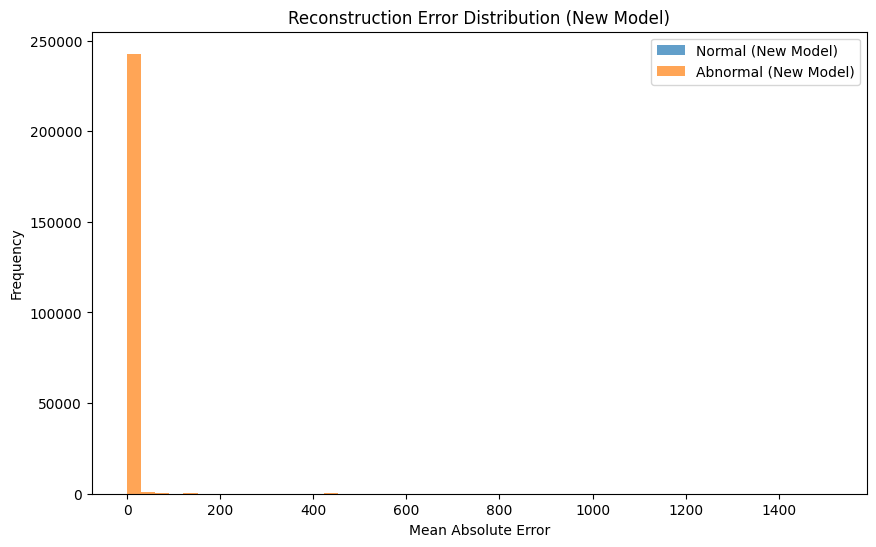

New threshold for anomaly detection (95th percentile): 0.29893850363731916

Performance of the new model:
Accuracy: 0.5121
Precision: 0.0002
Recall: 0.9048
F1-score: 0.0003


In [ ]:
import numpy as np
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
import matplotlib.pyplot as plt

# Predict on the scaled data using the new model
X_normal_pred_new = autoencoder_new.predict(X_normal_scaled)
if X_abnormal_scaled is not None:
    X_abnormal_pred_new = autoencoder_new.predict(X_abnormal_scaled)

# Calculate the mean absolute error for each sample
normal_mae_new = np.mean(np.abs(X_normal_scaled - X_normal_pred_new), axis=1)
if X_abnormal_scaled is not None:
    abnormal_mae_new = np.mean(np.abs(X_abnormal_scaled - X_abnormal_pred_new), axis=1)

# Plot the reconstruction error distributions for the new model
plt.figure(figsize=(10, 6))
plt.hist(normal_mae_new, bins=50, label='Normal (New Model)', alpha=0.7)
if X_abnormal_scaled is not None:
    plt.hist(abnormal_mae_new, bins=50, label='Abnormal (New Model)', alpha=0.7)
plt.xlabel('Mean Absolute Error')
plt.ylabel('Frequency')
plt.title('Reconstruction Error Distribution (New Model)')
plt.legend()
plt.show()

# Set a new threshold for anomaly detection (e.g., 95th percentile)
threshold_new = np.percentile(normal_mae_new, 95)
print(f"New threshold for anomaly detection (95th percentile): {threshold_new}")

# Classify anomalies
y_pred_normal_new = normal_mae_new < threshold_new
y_pred_abnormal_new = abnormal_mae_new > threshold_new

# True labels
y_true_normal_new = np.ones(len(y_pred_normal_new))
y_true_abnormal_new = np.ones(len(y_pred_abnormal_new))

# Concatenate predictions and true labels
y_pred_new = np.concatenate([y_pred_normal_new, y_pred_abnormal_new])
y_true_new = np.concatenate([y_true_normal_new, np.zeros(len(y_pred_abnormal_new))])


# Calculate and print classification metrics
accuracy_new = accuracy_score(y_true_new, y_pred_new)
precision_new = precision_score(y_true_new, y_pred_new)
recall_new = recall_score(y_true_new, y_pred_new)
f1_new = f1_score(y_true_new, y_pred_new)

print("\nPerformance of the new model:")
print(f"Accuracy: {accuracy_new:.4f}")
print(f"Precision: {precision_new:.4f}")
print(f"Recall: {recall_new:.4f}")
print(f"F1-score: {f1_new:.4f}")

In [ ]:
from sklearn.ensemble import IsolationForest
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
import numpy as np

# 1. Instantiate IsolationForest
iso_forest = IsolationForest(contamination='auto', random_state=42)

# 2. Fit the model on normal data
iso_forest.fit(X_normal_scaled)

# 3. Predict on both normal and abnormal data
# Predict returns 1 for inliers, -1 for outliers
pred_normal = iso_forest.predict(X_normal_scaled)
pred_abnormal = iso_forest.predict(X_abnormal_scaled)

# 4. Convert predictions to binary format (1 for anomaly, 0 for normal)
# A value of -1 is an anomaly (1), and 1 is normal (0)
y_pred_normal_iso = [1 if x == -1 else 0 for x in pred_normal]
y_pred_abnormal_iso = [1 if x == -1 else 0 for x in pred_abnormal]

# 5. Create true labels
y_true_normal_iso = np.zeros(len(y_pred_normal_iso))
y_true_abnormal_iso = np.ones(len(y_pred_abnormal_iso))

# 6. Concatenate predictions and true labels
y_pred_iso = np.concatenate([y_pred_normal_iso, y_pred_abnormal_iso])
y_true_iso = np.concatenate([y_true_normal_iso, y_true_abnormal_iso])

# 7. Calculate and print classification metrics
accuracy_iso = accuracy_score(y_true_iso, y_pred_iso)
precision_iso = precision_score(y_true_iso, y_pred_iso)
recall_iso = recall_score(y_true_iso, y_pred_iso)
f1_iso = f1_score(y_true_iso, y_pred_iso)

print("Isolation Forest Performance:")
print(f"Accuracy: {accuracy_iso:.4f}")
print(f"Precision: {precision_iso:.4f}")
print(f"Recall: {recall_iso:.4f}")
print(f"F1-score: {f1_iso:.4f}")

Isolation Forest Performance:
Accuracy: 0.4229
Precision: 0.9999
Recall: 0.4229
F1-score: 0.5944


In [ ]:
from sklearn.ensemble import IsolationForest
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
import numpy as np

# 1. Instantiate IsolationForest with a higher contamination value
iso_forest_tuned = IsolationForest(contamination=0.1, random_state=42)

# 2. Fit the model on normal data
iso_forest_tuned.fit(X_normal_scaled)

# 3. Predict on both normal and abnormal data
pred_normal_tuned = iso_forest_tuned.predict(X_normal_scaled)
pred_abnormal_tuned = iso_forest_tuned.predict(X_abnormal_scaled)

# 4. Convert predictions to binary format (1 for anomaly, 0 for normal)
y_pred_normal_iso_tuned = [1 if x == -1 else 0 for x in pred_normal_tuned]
y_pred_abnormal_iso_tuned = [1 if x == -1 else 0 for x in pred_abnormal_tuned]

# 5. Create true labels
y_true_normal_iso_tuned = np.zeros(len(y_pred_normal_iso_tuned))
y_true_abnormal_iso_tuned = np.ones(len(y_pred_abnormal_iso_tuned))

# 6. Concatenate predictions and true labels
y_pred_iso_tuned = np.concatenate([y_pred_normal_iso_tuned, y_pred_abnormal_iso_tuned])
y_true_iso_tuned = np.concatenate([y_true_normal_iso_tuned, y_true_abnormal_iso_tuned])

# 7. Calculate and print classification metrics
accuracy_iso_tuned = accuracy_score(y_true_iso_tuned, y_pred_iso_tuned)
precision_iso_tuned = precision_score(y_true_iso_tuned, y_pred_iso_tuned)
recall_iso_tuned = recall_score(y_true_iso_tuned, y_pred_iso_tuned)
f1_iso_tuned = f1_score(y_true_iso_tuned, y_pred_iso_tuned)

print("Tuned Isolation Forest Performance (contamination=0.1):")
print(f"Accuracy: {accuracy_iso_tuned:.4f}")
print(f"Precision: {precision_iso_tuned:.4f}")
print(f"Recall: {recall_iso_tuned:.4f}")
print(f"F1-score: {f1_iso_tuned:.4f}")

Tuned Isolation Forest Performance (contamination=0.1):
Accuracy: 0.0456
Precision: 0.9998
Recall: 0.0456
F1-score: 0.0871


In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
import numpy as np

# 1. Get the anomaly scores for the training data
scores_normal = iso_forest.decision_function(X_normal_scaled)
scores_abnormal = iso_forest.decision_function(X_abnormal_scaled)

# 2. Set a new threshold to increase recall
# We'll set the threshold at the 5th percentile of the scores of the normal data.
# This means we'll classify the 5% of normal data with the lowest scores as anomalies.
threshold_iso_tuned = np.percentile(scores_normal, 5)

print(f"Tuned Isolation Forest threshold: {threshold_iso_tuned:.4f}")

# 3. Classify anomalies based on the new threshold
y_pred_normal_iso_tuned = scores_normal < threshold_iso_tuned
y_pred_abnormal_iso_tuned = scores_abnormal < threshold_iso_tuned

# 4. Create true labels
y_true_normal_iso_tuned = np.zeros(len(y_pred_normal_iso_tuned))
y_true_abnormal_iso_tuned = np.ones(len(y_pred_abnormal_iso_tuned))

# 5. Concatenate predictions and true labels
y_pred_iso_tuned = np.concatenate([y_pred_normal_iso_tuned, y_pred_abnormal_iso_tuned])
y_true_iso_tuned = np.concatenate([y_true_normal_iso_tuned, y_true_abnormal_iso_tuned])

# 6. Calculate and print classification metrics
accuracy_iso_tuned = accuracy_score(y_true_iso_tuned, y_pred_iso_tuned)
precision_iso_tuned = precision_score(y_true_iso_tuned, y_pred_iso_tuned)
recall_iso_tuned = recall_score(y_true_iso_tuned, y_pred_iso_tuned)
f1_iso_tuned = f1_score(y_true_iso_tuned, y_pred_iso_tuned)

print("\nTuned Isolation Forest Performance (manual threshold):")
print(f"Accuracy: {accuracy_iso_tuned:.4f}")
print(f"Precision: {precision_iso_tuned:.4f}")
print(f"Recall: {recall_iso_tuned:.4f}")
print(f"F1-score: {f1_iso_tuned:.4f}")

Tuned Isolation Forest threshold: -0.0611

Tuned Isolation Forest Performance (manual threshold):
Accuracy: 0.0285
Precision: 0.9999
Recall: 0.0284
F1-score: 0.0553
